In [95]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from keras.layers import Dense
from keras.models import Sequential


In [96]:
X=np.array([[1],[3],[2],[10],[4],[7],[8]])
y=np.array([[3,9,6,30,12,21,24]]).T

In [97]:
model=Sequential([
   Dense(1,input_shape=(1,),activation='linear') #полносвязный слой
   #на входи принимает один сигнал(input_shape) и выдает один выход(первая еденица)


])

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [98]:
w1,w0=model.get_weights()
print(w1,w0)
w1=np.squeeze(w1)
w0=w0[0]
print(w1,w0)

[[0.5712856]] [0.]
0.5712856 0.0


In [99]:
from keras.activations import linear

model.predict(X[:1])#Очень хуево


1/1 [==============================] - 0s 139ms/step


array([[0.5712856]], dtype=float32)

In [100]:
linear(w1*X[:1]+w0)

array([[0.57128561]])

Будем оптимизировать MSE, возьмем по 100 разных значений весов и посчитаем в них MSE, затем отобразим на трехмерном графике.
Так же отобразим и веса, которые есть на момент инициализации сети

In [101]:
from mpl_toolkits.mplot3d.axes3d import Axes3D

def mse(w1,w0):
    y_pred=w1+X[:,0]+w0
    return np.mean((y-y_pred)**2)

In [102]:
coefs_w1=np.linspace(-5,10,num=100)
coefs_w0=np.linspace(-5,5,num=100)
w1s,w0s=np.meshgrid(coefs_w1,coefs_w0)



""" #посмотреть этот пример для обьяснения
coefs_w1 = np.array([1, 2, 3,4])
coefs_w0 = np.array([0.1, 0.2, 0.3,1,2,3])

# Создаем сетку значений для coefs_w1 и coefs_w0
w1s, w0s = np.meshgrid(coefs_w1, coefs_w0)

w1s,w0s """

' #посмотреть этот пример для обьяснения\ncoefs_w1 = np.array([1, 2, 3,4])\ncoefs_w0 = np.array([0.1, 0.2, 0.3,1,2,3])\n\n# Создаем сетку значений для coefs_w1 и coefs_w0\nw1s, w0s = np.meshgrid(coefs_w1, coefs_w0)\n\nw1s,w0s '

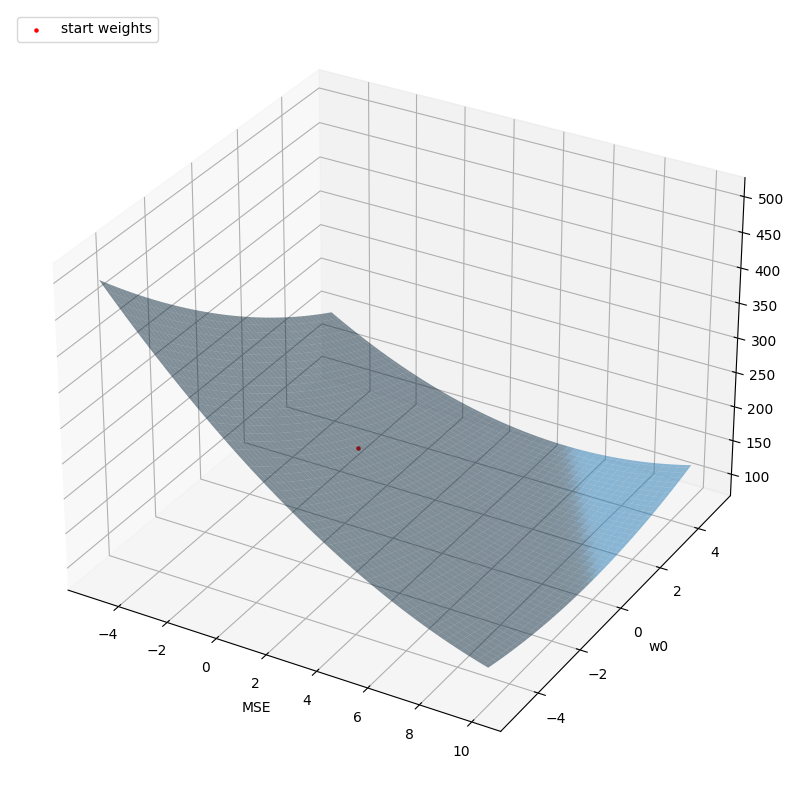

In [103]:
fig=plt.figure(figsize=(15,10))
ax=fig.add_subplot(111,projection='3d')

zs=np.array([mse(i,j) for i,j in zip(np.ravel(w1s),np.ravel(w0s))]) #ravel - преобразование в одномерный массив
z=zs.reshape(w1s.shape)

ax.plot_surface(w1s,w0s,z,alpha=.5)
ax.scatter(w1,w0,mse(w1,w0),c='r',s=5,label='start weights')

ax.set_xlabel('w1')
ax.set_ylabel('w0')
ax.set_xlabel('MSE')
plt.legend(loc='upper left')
plt.show()

#То есть здесь нужно использовать градиентный спуск для поиска самых оптимальных весов


In [104]:
def mserror(X,w1,w0,y):
    y_pred=w1*X[:,0]+w0
    return np.sum((y-y_pred)**2)/len(y_pred)

In [105]:
#градиент функции MSE
def gr_mserror(X,w1,w0,y):
    y_pred=w1*X+w0
    return {'grad_w1':2/len(y)*np.sum((y-y_pred)*(-X)),#формула производной от w1
            'grad_w0' : 2/len(y)*np.sum((y-y_pred))*(-1)}


In [106]:
preds=X*w1+w0
preds

array([[0.57128561],
       [1.71385682],
       [1.14257121],
       [5.71285605],
       [2.28514242],
       [3.99899924],
       [4.57028484]])

In [107]:
df=pd.DataFrame({
    'true' : np.squeeze(y),
    'pred' : np.squeeze(preds)
})
df

,true,pred
0,3,0.571286
1,9,1.713857
2,6,1.142571
3,30,5.712856
4,12,2.285142
5,21,3.998999
6,24,4.570285


In [108]:
np.mean((df['true']-df['pred'])**2) #текущая mse до оптимизации

204.76754676063254

In [109]:
weights_1=[w1]
weights_0=[w0]


grad=gr_mserror(X,w1,w0,y)

In [110]:
next_w1=w1-grad['grad_w1']
next_w0=w0-grad['grad_w0']

next_w1,next_w0 #следующие веса

(169.19345642839158, 24.28714394569397)

In [111]:
preds=X*next_w1+next_w0

In [112]:
df=pd.DataFrame({
    'true' : np.squeeze(y),
    'pred' : np.squeeze(preds)
})
df #стало как будто еще хуевей, это из-за того что мы ходим слишком большими шагами

,true,pred
0,3,193.480600
1,9,531.867513
2,6,362.674057
3,30,1716.221708
4,12,701.060970
5,21,1208.641339
6,24,1377.834795


In [113]:
np.mean((df['true']-df['pred'])**2) #текущая mse
  

999771.2786644998

In [114]:
#для того чтобы уменьшить шаги добавим скорость обучения
l=0.01

next_w1=w1-l*grad['grad_w1']
next_w0=w0-l*grad['grad_w0']

weights_1.append(next_w1)
weights_0.append(next_w0)


next_w1,next_w0 #следующие веса

(2.257507313660213, 0.2428714394569397)

In [115]:
preds=X*next_w1+next_w0

df=pd.DataFrame({
    'true' : np.squeeze(y),
    'pred' : np.squeeze(preds)
})
df

,true,pred
0,3,2.500379
1,9,7.015393
2,6,4.757886
3,30,22.817945
4,12,9.272901
5,21,16.045423
6,24,18.302930


In [116]:
np.mean((df['true']-df['pred'])**2) #текущая mse
#стало ахуенно да

17.393509516948203

In [117]:
grad=gr_mserror(X,next_w1,next_w0,y)
grad

{'grad_w1': -49.12149211416439, 'grad_w0': -6.939183984483991}

In [118]:
#потом продолжаем таким же алгоритмом

n=100 #numbers of iterations

for i in range(n):
    cur_weight1=next_w1
    cur_weight0=next_w0
    grad=gr_mserror(X,cur_weight1,cur_weight0,y)

    next_w1=cur_weight1-l*grad['grad_w1']
    next_w0=cur_weight0-l*grad['grad_w0']

    weights_1.append(next_w1)
    weights_0.append(next_w0)



In [119]:
preds=X*cur_weight1+cur_weight0

df=pd.DataFrame({
    'true' : np.squeeze(y),
    'pred' : np.squeeze(preds)
})
df

,true,pred
0,3,3.170357
1,9,9.112491
2,6,6.141424
3,30,29.909963
4,12,12.083559
5,21,20.996761
6,24,23.967828


In [120]:
np.mean((df['true']-df['pred'])**2) #текущая mse


0.011115820942621448

In [121]:
#Через keras

df=pd.DataFrame({
    'true' : np.squeeze(y),
    'pred' : np.squeeze(model.predict(X))
})
df

1/1 [==============================] - 0s 30ms/step


,true,pred
0,3,0.571286
1,9,1.713857
2,6,1.142571
3,30,5.712856
4,12,2.285142
5,21,3.998999
6,24,4.570285


In [122]:
np.mean((df['true']-df['pred'])**2) #текущая mse


204.76754568525283

In [123]:
model.compile(optimizer='sgd',loss='mse',metrics='mae')

In [124]:
model.get_weights()

[array([[0.5712856]], dtype=float32), array([0.], dtype=float32)]

In [125]:
n_epochs=10

weights=[[model.get_weights()[0][0][0], model.get_weights()[1][0]]]

for i in range(n_epochs):
    model.fit(X,y)
    weights.append([model.get_weights()[0][0][0],model.get_weights()[1][0]])

weights=np.array(weights)
weights

1/1 [==============================] - 0s 16ms/step - loss: 0.0302 - mae: 0.1493


array([[0.5712856 , 0.        ],
       [2.2575073 , 0.24287145],
       [2.7487223 , 0.31226328],
       [2.8919544 , 0.33114576],
       [2.9338543 , 0.3353274 ],
       [2.9462457 , 0.33523542],
       [2.950043  , 0.33390614],
       [2.9513369 , 0.3322237 ],
       [2.9519005 , 0.33044556],
       [2.9522507 , 0.3286466 ],
       [2.9525378 , 0.3268486 ]], dtype=float32)

In [126]:
df=pd.DataFrame({
    'true' : np.squeeze(y),
    'pred' : np.squeeze(model.predict(X))
})
df


1/1 [==============================] - 0s 39ms/step


,true,pred
0,3,3.279386
1,9,9.184463
2,6,6.231924
3,30,29.852226
4,12,12.137000
5,21,20.994614
6,24,23.947151


In [127]:
np.mean((df['true']-df['pred'])**2) 


0.029900000897742172

In [128]:
#Cеть для классификации чисел

from keras.datasets import mnist

(X_train,y_train),(X_test,y_test)=mnist.load_data()